## Quiz #1 mecanismos corte 2

**Integrantes:**
 
- Karla Sofía Arrieta Arroyo - T00067928

- Luna Katalina Quintero Jiménez - T00068464

- Luis Esteban Martínez Urrego - T00068367


La imagen del ejercicio en cuestión es:
![Quiz](Quiz.jpeg)

Las ecuaciones desarrolladas a partir de los lazos vectoriales fueron:
![Parte 1](quizSol1.png)
![Parte 2](QuizSol2.png)
![Parte 3](QuizSol3.png)

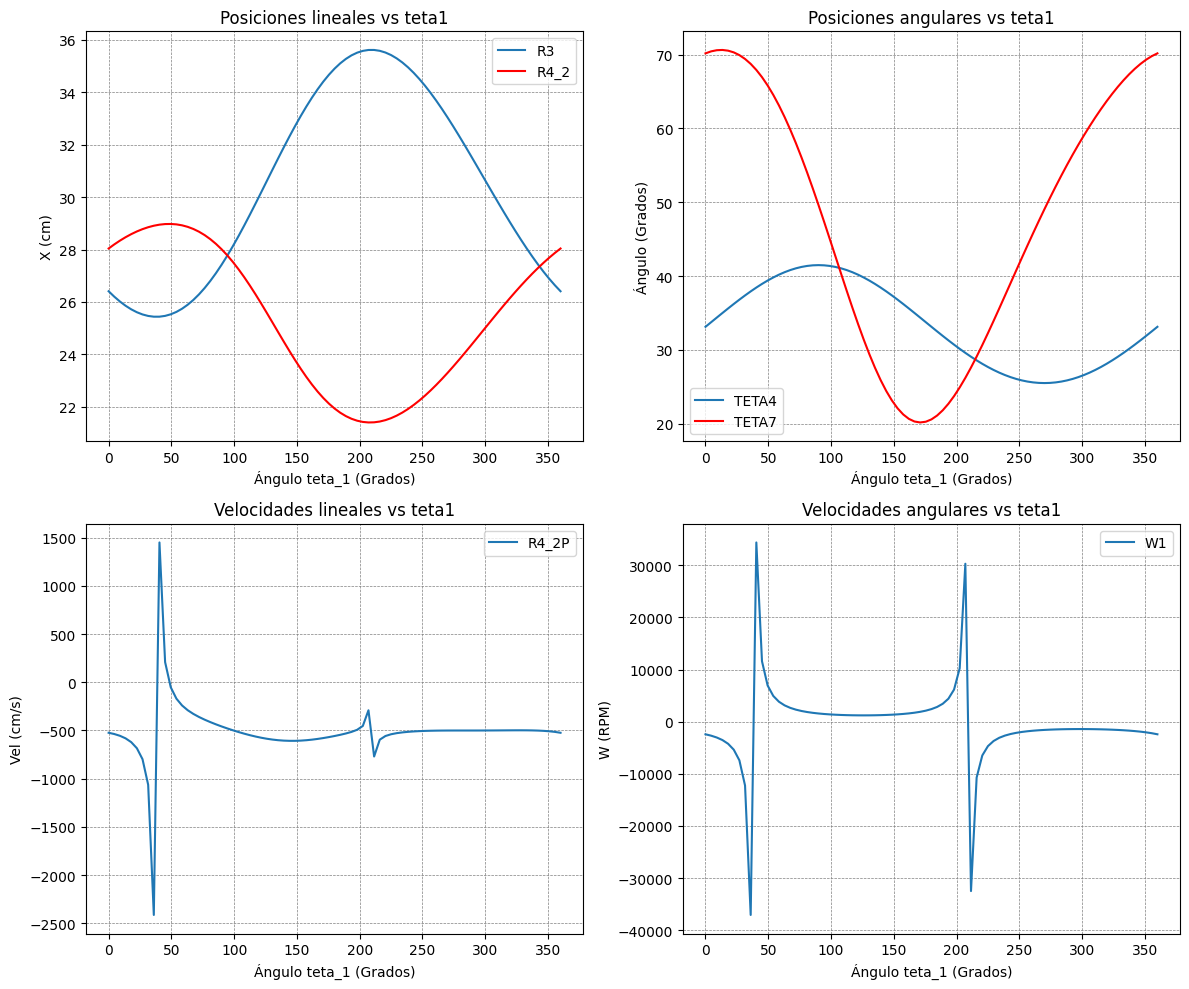

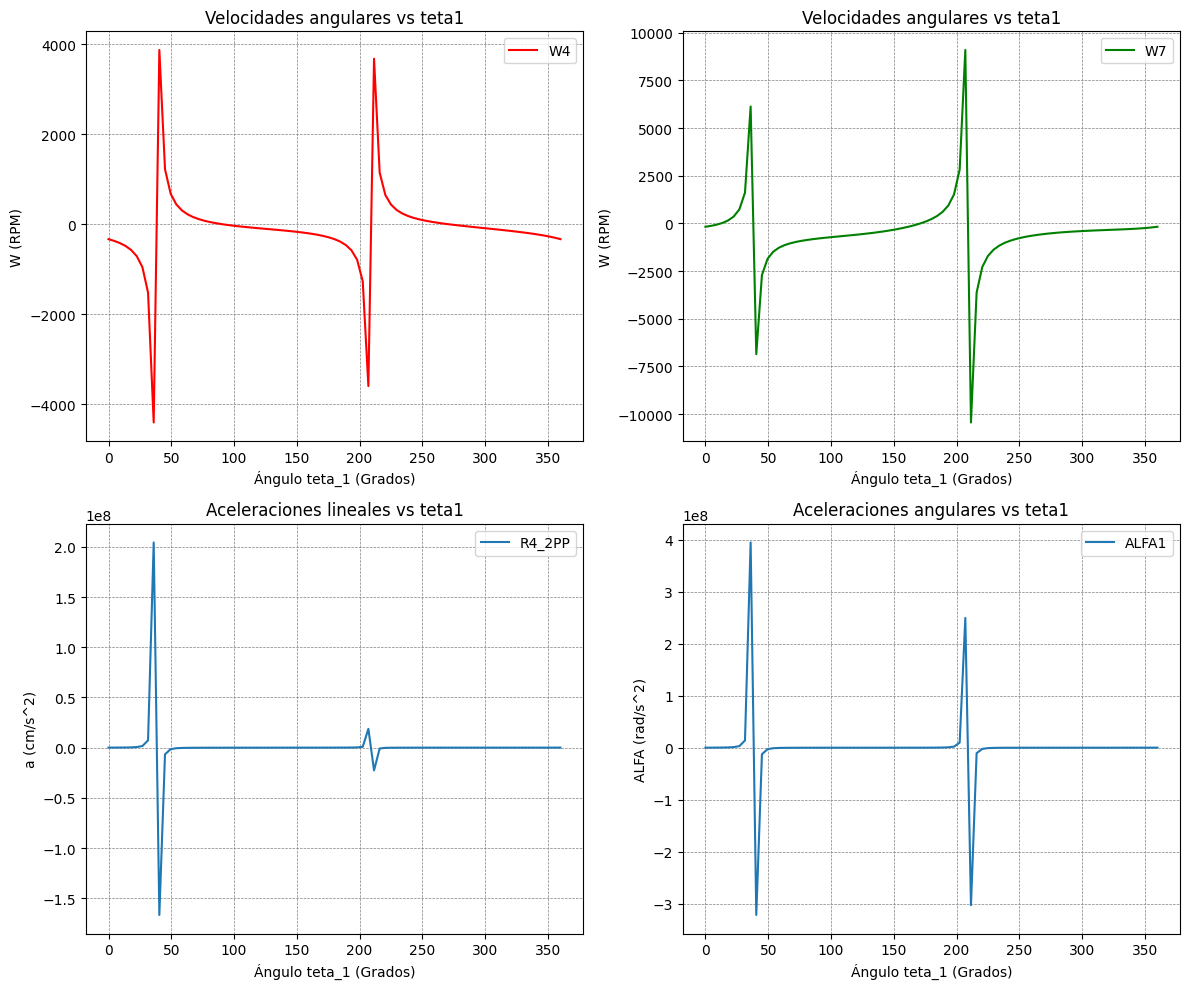

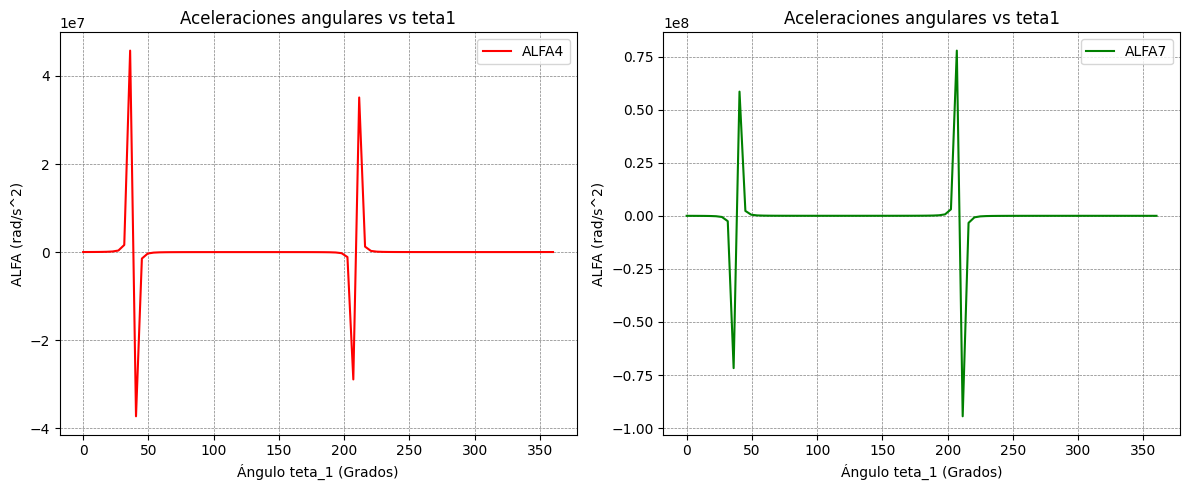

In [2]:
# -----------------------------------------------------------------
# Nombre del código: Solución al quiz #1 (Corte 2).
# Tema:      Análisis de posiciones, velocidades y aceleraciones.
# Autores:    Karla Sofía Arrieta Arroyo - T00067928
#             Luna Katalina Quintero Jiménez - T00068464
#             Luis Esteban Martínez Urrego - T00068367
# Copyright (C) 2025 
# Fecha de creación: 28/03/2025

# -----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# En Python no hay que limpiar consola :D

#____________________________________________
# Funciones necesaria
def carte(long, teta):
    """Lo que hace es que: Devuelve coordenadas cartesianas a partir de coordenadas polares"""
    return long * np.array([np.cos(teta), np.sin(teta)])

#____________________________________________
# Valores de entrada dados por el problema
r1 = 3 * np.sqrt(2)
r2 = 20.0
teta2 = np.pi/2
teta3 = 0
r4_1 = 36.6
r6 = 20.0
teta6 = 30 * np.pi / 180
r7 = 4 * np.sqrt(2)
r3p = 700
r3pp = -25000

#_____________________________________________
# Variables globales (se definirán durante la ejecución del bucle)
teta1 = 0  # Valor inicial para teta1
w1 = 0
alfa1 = 0
teta4 = 0
w4 = 0
alfa4 = 0
teta7 = 0
w7 = 0
alfa7 = 0
r3 = 0
r4_2 = 0
r4_2p = 0
r4_2pp = 0

#_____________________________________________
# Funciones de lazo de posición

# Se define el lazo 1 de posiciones

def lazo1P(x):
    global teta1, teta3, teta4, r1, r2, r4_1
    r3 = x[0]
    teta4 = x[1]
    
    R1 = carte(r1, teta1)
    R2 = carte(r2, teta2)
    R3 = carte(r3, teta3)
    R4_1 = carte(r4_1, teta4)
    
    f = R1 + R2 + R3 - R4_1
    return f

# Se define el lazo 2 de posiciones

def lazo2P(x):
    global teta1, teta4, teta6, r1, r6, r7
    teta7 = x[0]
    r4_2 = x[1]
    
    R5 = carte(r1, teta1)
    R6 = carte(r6, teta6)
    R7 = carte(r7, teta7)
    R4_2 = carte(r4_2, teta4)
    
    f = R5 + R6 + R7 - R4_2
    return f

#_____________________________________________
# Funciones de lazo de velocidades

# Se define el lazo 1 de velocidades
def lazo1V(x):
    global teta1, teta3, teta4, r1, r3p, r4_1
    w1 = x[0]
    w4 = x[1]
    
    V1 = carte(r1 * w1, teta1 + np.pi/2)
    V3 = carte(r3p, teta3)
    V4_1 = carte(r4_1 * w4, teta4 + np.pi/2)
    
    f = V1 + V3 - V4_1
    return f

# Se define el lazo 2 de velocidades
def lazo2V(x):
    global teta1, teta4, teta7, r1, r7, r4_2, w1, w4
    w7 = x[0]
    r4_2p = x[1]
    
    V5 = carte(r1 * w1, teta1 + np.pi/2)
    V7 = carte(r7 * w7, teta7 + np.pi/2)
    V4_2 = carte(r4_2p, teta4) + carte(r4_2 * w4, teta4 + np.pi/2)
    
    f = V5 + V7 - V4_2
    return f

#_____________________________________________
# Funciones de lazo de aceleraciones

# Se define el lazo 1 de aceleraciones
def lazo1A(x):
    global teta1, teta3, teta4, r1, r3pp, r4_1, w1, w4
    alfa1 = x[0]
    alfa4 = x[1]
    
    A1 = carte(r1 * alfa1, teta1 + np.pi/2) - carte(r1 * w1**2, teta1)
    A3 = carte(r3pp, teta3)
    A4_1 = carte(r4_1 * alfa4, teta4 + np.pi/2) - carte(r4_1 * w4**2, teta4)
    
    f = A1 + A3 - A4_1
    return f

# Se define el lazo 2 de aceleraciones
def lazo2A(x):
    global teta1, teta4, teta7, r1, r7, r4_2, r4_2p, w1, w4, w7, alfa1, alfa4
    alfa7 = x[0]
    r4_2pp = x[1]
    
    A5 = carte(r1 * alfa1, teta1 + np.pi/2) - carte(r1 * w1**2, teta1)
    A7 = carte(r7 * alfa7, teta7 + np.pi/2) - carte(r7 * w7**2, teta7)
    A4_2 = carte(r4_2pp, teta4) + 2 * carte(r4_2p * w4, teta4 + np.pi/2) + \
           carte(r4_2 * alfa4, teta4 + np.pi/2) - carte(r4_2 * w4**2, teta4)
    
    f = A5 + A7 - A4_2
    return f

# Valores iniciales de los arreglos
x0 = np.array([10, 40 * np.pi / 180])
x1 = np.array([20 * np.pi / 180, 15])
x2 = np.array([50, -80]) * 0
x3 = np.array([10, 40 * np.pi / 180]) * 0
x4 = np.array([100, 300]) * 0
x5 = np.array([50, -80]) * 0

# Inicializamos los arreglos para almacenar resultados
pasos = int(2 * np.pi / (np.pi/40)) + 1
TETA1 = np.zeros(pasos)
R3 = np.zeros(pasos)
TETA4 = np.zeros(pasos)
TETA7 = np.zeros(pasos)
R4_2 = np.zeros(pasos)
W1 = np.zeros(pasos)
W4 = np.zeros(pasos)
W7 = np.zeros(pasos)
R4_2P = np.zeros(pasos)
ALFA1 = np.zeros(pasos)
ALFA4 = np.zeros(pasos)
ALFA7 = np.zeros(pasos)
R4_2PP = np.zeros(pasos)

# Iniciamos el ciclo de cálculos
i = 0
for teta1_val in np.linspace(0, 2 * np.pi, pasos):
    teta1 = teta1_val
    
    # Usando la función fsolve para resolver los lazos:

    # Resolver lazo de posición 1
    a = fsolve(lazo1P, x0)
    r3 = a[0]
    teta4 = a[1]
    
    # Resolver lazo de posición 2
    b = fsolve(lazo2P, x1)
    teta7 = b[0]
    r4_2 = b[1]
    
    # Resolver lazo de velocidad 1
    c = fsolve(lazo1V, x2)
    w1 = c[0]
    w4 = c[1]
    
    # Resolver lazo de velocidad 2
    d = fsolve(lazo2V, x3)
    w7 = d[0]
    r4_2p = d[1]
    
    # Resolver lazo de aceleración 1
    e = fsolve(lazo1A, x4)
    alfa1 = e[0]
    alfa4 = e[1]
    
    # Resolver lazo de aceleración 2
    f = fsolve(lazo2A, x5)
    alfa7 = f[0]
    r4_2pp = f[1]
    
    # Guardamos las variables para las gráficas
    TETA1[i] = teta1 * 180 / np.pi
    
    R3[i] = a[0]
    TETA4[i] = a[1] * 180 / np.pi
    
    TETA7[i] = b[0] * 180 / np.pi
    R4_2[i] = b[1]
    
    W1[i] = c[0] * 60 / (2 * np.pi)
    W4[i] = c[1] * 60 / (2 * np.pi)
    
    W7[i] = d[0] * 60 / (2 * np.pi)
    R4_2P[i] = d[1]
    
    ALFA1[i] = e[0]
    ALFA4[i] = e[1]
    
    ALFA7[i] = f[0]
    R4_2PP[i] = f[1]
    
    # Actualizamos posiciones iniciales
    x0 = a
    x1 = b
    x2 = c
    x3 = d
    x4 = e
    x5 = f
    
    # Variable contadora
    i += 1

# Configuración de gráficas
plt.figure(figsize=(12, 10))

# Gráfica 1 - Posiciones lineales
plt.subplot(2, 2, 1)
plt.plot(TETA1, R3, label="R3")
plt.plot(TETA1, R4_2, 'r', label="R4_2")
plt.title("Posiciones lineales vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("X (cm)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Gráfica 2 - Posiciones angulares
plt.subplot(2, 2, 2)
plt.plot(TETA1, TETA4, label="TETA4")
plt.plot(TETA1, TETA7, 'r', label="TETA7")
plt.title("Posiciones angulares vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("Ángulo (Grados)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Gráfica 3 - Velocidades lineales
plt.subplot(2, 2, 3)
plt.plot(TETA1, R4_2P, label="R4_2P")
plt.title("Velocidades lineales vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("Vel (cm/s)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Gráfica 4 - Velocidades angulares (W1)
plt.subplot(2, 2, 4)
plt.plot(TETA1, W1, label="W1")
plt.title("Velocidades angulares vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("W (RPM)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.savefig('figura1.png')

# Crear segunda figura
plt.figure(figsize=(12, 10))

# Gráfica 1 - Velocidades angulares (W4)
plt.subplot(2, 2, 1)
plt.plot(TETA1, W4, 'r', label="W4")
plt.title("Velocidades angulares vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("W (RPM)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Gráfica 2 - Velocidades angulares (W7)
plt.subplot(2, 2, 2)
plt.plot(TETA1, W7, 'g', label="W7")
plt.title("Velocidades angulares vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("W (RPM)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Gráfica 3 - Aceleraciones lineales
plt.subplot(2, 2, 3)
plt.plot(TETA1, R4_2PP, label="R4_2PP")
plt.title("Aceleraciones lineales vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("a (cm/s^2)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Gráfica 4 - Aceleraciones angulares (ALFA1)
plt.subplot(2, 2, 4)
plt.plot(TETA1, ALFA1, label="ALFA1")
plt.title("Aceleraciones angulares vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("ALFA (rad/s^2)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.savefig('figura2.png')

# Crear tercera figura
plt.figure(figsize=(12, 5))

# Gráfica 1 - Aceleraciones angulares (ALFA4)
plt.subplot(1, 2, 1)
plt.plot(TETA1, ALFA4, 'r', label="ALFA4")
plt.title("Aceleraciones angulares vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("ALFA (rad/s^2)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

# Gráfica 2 - Aceleraciones angulares (ALFA7)
plt.subplot(1, 2, 2)
plt.plot(TETA1, ALFA7, 'g', label="ALFA7")
plt.title("Aceleraciones angulares vs teta1", fontsize=12)
plt.xlabel("Ángulo teta_1 (Grados)", fontsize=10)
plt.ylabel("ALFA (rad/s^2)", fontsize=10)
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.savefig('figura3.png')

# Mostramos todas las figuras
plt.show()

# That's all folks!
# Fin del código